# Файлы JSON и модуль datetime


## JSON
JSON (JavaScript Object Notation) – это текстовый формат для хранения и передачи данных.
Он представляет данные в удобном для чтения виде и используется для обмена информацией между системами.


In [ ]:
{
    "name": "Alice",
    "age": 25,
    "is_student": false,
    "courses": ["Math", "Physics"]
}


#### Особенности JSON:
* Структура представляет собой объекты (ключ-значение, как dict в Python) и массивы (как list).
* Поддерживает числа, строки, булевы значения, массивы и объекты.
* Все строки в JSON записываются только в двойных кавычках, в отличие от Python, где можно использовать одинарные или двойные.
* Данные хранятся в текстовом виде, что делает JSON универсальным.


#### Где используется JSON?
JSON применяется везде, где требуется передача или хранение структурированных данных.
* API (обмен данными между системами): передавать данные между клиентом и сервером.
* Базы данных: например для хранения документов в MongoDB.
* Конфигурационные файлы: для хранения настроек приложений.
* Фронтенд и бэкенд: для передачи данных между браузером и сервером.


#### Модуль json
Python содержит встроенный модуль json, который позволяет сериализовать и десериализовать данные в формате JSON.


## Сериализация
**Сериализация** – это процесс преобразования данных в формат JSON, чтобы их можно было хранить или передавать.  
Python предоставляет две функции для сериализации JSON:
* `json.dumps(obj)` – преобразует Python-объект в JSON-строку.
* `json.dump(obj, file)` – записывает JSON-данные в файл.

Пример преобразования в JSON-строку:

In [29]:
import json

data = {'name': 'Alice', 'age': 25, 'is_student': False}

json_string = json.dumps(data)  # Преобразование в JSON-строку
print(type(json_string))
print(json_string)


<class 'str'>
{"name": "Alice", "age": 25, "is_student": false}


Пример записи в JSON-файл:


In [ ]:
with open("data.json", "w") as file:
    json.dump(data, file)  # Запись JSON в файл


#### Когда использовать?
* `json.dumps()` – если нужно преобразовать объект Python в JSON-строку для передачи по сети или хранения в базе данных.
* `json.dump()` – если нужно записать объект Python в JSON-файл, например для сохранения конфигураций.


#### Параметр ensure_ascii
Параметр ensure_ascii определяет, **как JSON будет хранить юникод-символы.**  
При ensure_ascii=True (по умолчанию) **все не-ASCII символы кодируются в \u-формат**,  
а при ensure_ascii=False **сохраняются в читаемом виде.**


In [ ]:
data = {"город": "Берлин", "страна": "Германия"}

json_string = json.dumps(data)  # По умолчанию (ensure_ascii=True)
print(json_string)

json_string = json.dumps(data, ensure_ascii=False)  # Отключаем ASCII-кодировку
print(json_string)


## Десериализация
Десериализация – это процесс обратного преобразования JSON в объект Python, чтобы с ним можно было работать в программе.  
Python предоставляет две функции для десериализации JSON:  
* `json.loads(json_string)` – преобразует JSON-строку в Python-объект.
* `json.load(file)` – загружает JSON-данные из файла в Python-объект.


Пример преобразования JSON-строки в объект Python:


In [30]:
json_object = '{"name": "Alice", "age": 25, "is_student": false}'
json_objects = '[{"name": "Alice", "age": 25, "is_student": false}, {"name": "Bob", "age": 20, "is_student": true}]'

data_dict = json.loads(json_object)  # Преобразование JSON-строки в Python-объект
print(type(data_dict))
print(data_dict)

data_list = json.loads(json_objects)  # Преобразование JSON-строки в Python-объект
print(type(data_list))
print(data_list)


<class 'dict'>
{'name': 'Alice', 'age': 25, 'is_student': False}
<class 'list'>
[{'name': 'Alice', 'age': 25, 'is_student': False}, {'name': 'Bob', 'age': 20, 'is_student': True}]


Пример загрузки данных из JSON-файла в Python-объект.


In [31]:

with open("data.json", "r") as file:
    data = json.load(file)  # Загрузка JSON из файла

print(type(data))
print(data)


<class 'dict'>
{'dict_example': {'key': 'value'}, 'list_example': ['apple', 'banana'], 'tuple_example': ['apple', 'banana'], 'string_example': 'Hello', 'int_example': 42, 'float_example': 3.14, 'bool_example_true': True, 'bool_example_false': False, 'none_example': None}


##### Когда использовать?
* `json.loads()` – если JSON приходит в виде строки, например, из API.
* `json.load()` – если JSON хранится в файле и его нужно загрузить в Python.


## Сравнение типов Python и JSON
При сериализации и десериализации типы данных Python преобразуются в соответствующие JSON-форматы и обратно.


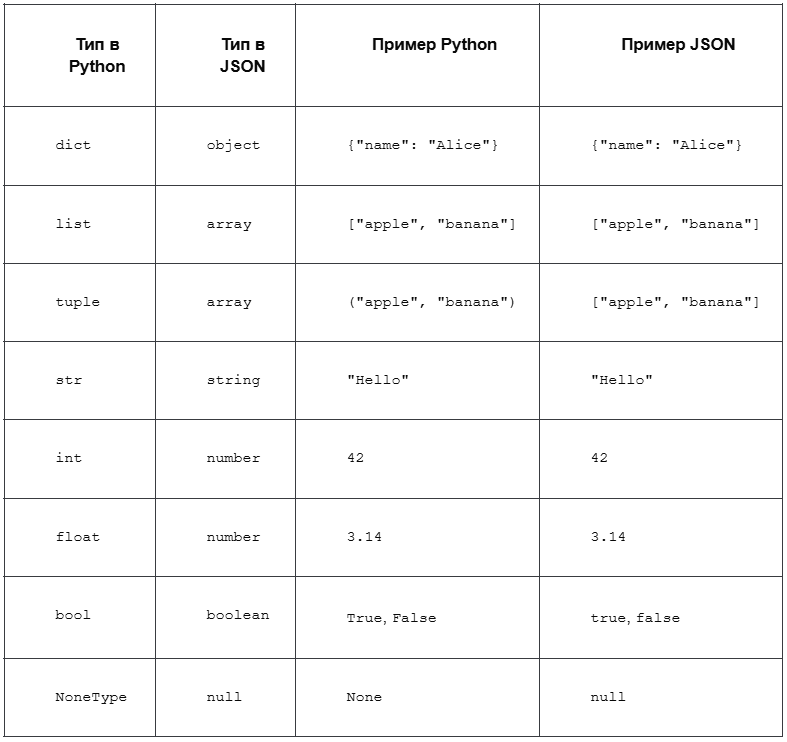

#### Особенности:
* Кортежи (tuple) преобразуются в массив (array), так как в JSON нет отдельного типа для кортежей.
   * set и frozenset не поддерживаются в JSON, так как в нём нет аналога для множеств.
* Булевы значения (True, False) в JSON записываются с маленькой буквы (true, false).
* Отсутствие значения (None) в JSON записывается как null.


Пример: Запись в файл объекта, содержащего все типы данных

In [32]:
data = {
    "dict_example": {"key": "value"},
    "list_example": ["apple", "banana"],
    "tuple_example": ("apple", "banana"),
    "string_example": "Hello",
    "int_example": 42,
    "float_example": 3.14,
    "bool_example_true": True,
    "bool_example_false": False,
    "none_example": None
}

# Запись в файл data.json
with open("data.json", "w", encoding="utf-8") as file:
    json.dump(data, file)


Пример: Чтение обратно в Python


In [33]:
# Чтение данных обратно в Python
with open("data.json", "r", encoding="utf-8") as file:
    loaded_data = json.load(file)

# Вывод загруженных данных
print(type(loaded_data))
print(loaded_data)


<class 'dict'>
{'dict_example': {'key': 'value'}, 'list_example': ['apple', 'banana'], 'tuple_example': ['apple', 'banana'], 'string_example': 'Hello', 'int_example': 42, 'float_example': 3.14, 'bool_example_true': True, 'bool_example_false': False, 'none_example': None}


In [34]:
import json

data = {"город": "Берлин", "страна": "Германия"}

json_string = json.dumps(data)  # По умолчанию (ensure_ascii=True)
print(json_string)

json_string = json.dumps(data, ensure_ascii=False)  # Отключаем ASCII-кодировку
print(json_string)


{"\u0433\u043e\u0440\u043e\u0434": "\u0411\u0435\u0440\u043b\u0438\u043d", "\u0441\u0442\u0440\u0430\u043d\u0430": "\u0413\u0435\u0440\u043c\u0430\u043d\u0438\u044f"}
{"город": "Берлин", "страна": "Германия"}


In [37]:
import json

data = {"name": "Alice", "age": 25, "is_student": False, "city": "London"}

json_string = json.dumps(data, indent=2)  # Без сортировки ключей
print(json_string)

json_string = json.dumps(data, indent=4, sort_keys=True)  # Сортировка ключей
print(json_string)


{
  "name": "Alice",
  "age": 25,
  "is_student": false,
  "city": "London"
}
{
    "age": 25,
    "city": "London",
    "is_student": false,
    "name": "Alice"
}


## JSONDecodeError
**JSONDecodeError** возникает, если строка JSON имеет неверный формат и не может быть разобрана с помощью `json.loads()` или `json.load()`.
Ошибка указывает, что JSON-данные повреждены, содержат синтаксические ошибки или не соответствуют ожиданиям.


In [38]:
invalid_json = '{"name": "Alice", "age": 25, "is_student": false,'  # Ошибка: нет закрывающей скобки
data = json.loads(invalid_json)  # Загрузка некорректного JSON


JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 50 (char 49)

##### Используйте try-except** при загрузке JSON, чтобы избежать ошибки.


In [39]:
invalid_json = '{"name": "Alice", "age": 25, "is_student": false,'  # Ошибка: нет закрывающей скобки
try:
    data = json.loads(invalid_json)  # Попытка загрузки некорректного JSON
except json.JSONDecodeError as e:
    print(f"Ошибка декодирования JSON: {e}")


Ошибка декодирования JSON: Expecting property name enclosed in double quotes: line 1 column 50 (char 49)


#### Причины JSONDecodeError
* Пропущенные кавычки или запятые
`{"name": "Alice", "age": 25, "is_student": false,}`  # Лишняя запятая
* Использование одинарных кавычек вместо двойных
`{'name': 'Alice'}`  # Неверный формат
* Неполные или повреждённые данные
`{"name": "Alice", "age": 25`  # Нет закрывающей скобки


In [ ]:
#Что произойдёт при выполнении следующего кода?
import json
data = {
    "city": "Paris",
    "temperature": 22,
    "is_rainy": False
}

json_string = json.dumps(data)
loaded_data = json.loads(json_string)

print(type(json_string))
print(type(loaded_data))


In [ ]:
#Найди ошибку и исправь код:
import json

data = {"name": "Alice", "age": 25}
with open("user.json", "w", encoding="utf-8") as f:
    json.dumps(data, f)


In [ ]:
#Что произойдёт при десериализации этой строки?
import json
json.loads("{'x': 1, 'y': 2}")


In [ ]:
#Почему этот код вызывает ошибку?
import json

data = {"values": {1, 2, 3}}
json.dumps(data)


# Модуль datetime
Модуль datetime предоставляет инструменты для работы с датами, временем и их форматированием.
Он позволяет получать текущее время, вычислять разницу между датами, конвертировать форматы и работать с часовыми поясами.


## Получение текущей даты и времени
Для получения текущей даты и времени используется метод `datetime.now()` из модуля `datetime`.


In [40]:
from datetime import datetime

now = datetime.now()  # Получаем текущую дату и время
print(type(now))  # Объект datetime
print(now)


<class 'datetime.datetime'>
2025-08-07 11:05:47.216971


#### Особенности:
* Возвращает объект datetime с текущей датой и временем.
* Позволяет извлекать отдельные компоненты даты, такие как год, месяц, день, часы, минуты и секунды.


#### Зачем это нужно?
* Фиксация времени событий (например, в логах или базах данных).
* Отметка времени при выполнении операций (например, запись времени создания файла).
* Создание временных меток (например, для идентификаторов или кеширования данных).


### Извлечение отдельных компонентов даты
После получения текущего времени можно получить конкретные значения:


In [41]:
now = datetime.now()

print("Год:", now.year)
print("Месяц:", now.month)
print("День:", now.day)
print("Часы:", now.hour)
print("Минуты:", now.minute)
print("Секунды:", now.second)

Год: 2025
Месяц: 8
День: 7
Часы: 11
Минуты: 8
Секунды: 4


In [44]:
Y = datetime.now().year
Y

2025

In [42]:
now

datetime.datetime(2025, 8, 7, 11, 8, 4, 582285)

### Форматирование строковой даты
Метод `strftime()` используется для преобразования даты в строку в нужном формате.
Это позволяет представить дату в удобном виде, например, `"28.02.2025 14:30"` вместо стандартного `2025-02-28 14:30:00.000000`.


In [45]:
# Преобразование в строку
print(str(now))
# Преобразование в строку указанного формата
formatted_date = now.strftime("%d.%m.%Y %H:%M:%S")
print(type(formatted_date))
print(formatted_date)


2025-08-07 11:08:04.582285
<class 'str'>
07.08.2025 11:08:04


### Популярные коды форматов strftime


* %d
День (01-31)
28
  
* %m
Месяц (01-12)
02  

* %Y
Год (4 цифры)
2025
  
* %y
Год (2 цифры)
25

* %H
Часы (00-23)
14

* %M
Минуты (00-59)
30
  
* %S
Секунды (00-59)
15

* %A
Полное название дня
Friday

* %B
Полное название месяца
February

In [46]:

print(now.strftime("%Y-%m-%d"))       		# 2025-02-28 (ISO формат)
print(now.strftime("%d/%m/%Y"))       		# 28/02/2025 (европейский формат)
print(now.strftime("%H часов %M минут"))       	# 20 часов 30 минут (свободный формат) 
print(now.strftime("%A, %B %d, %Y"))  		# Friday, February 28, 2025



2025-08-07
07/08/2025
11 часов 08 минут
Thursday, August 07, 2025


### Преобразования строки в объект даты
Метод strptime() используется для преобразования строки в объект datetime.
Это необходимо, когда дата хранится в виде текста (например, в файле) и её нужно использовать для вычислений или фильтрации.
При разборе строки необходимо использовать те же форматные коды (%d, %m, %Y и т. д.), которые соответствуют порядку и структуре даты в строке.


In [47]:
date_string = "28|02|2025 14-30-15"  # Дата в виде строки
date_obj = datetime.strptime(date_string, "%d|%m|%Y %H-%M-%S")  # Указываем форматы и те же разделители

print(type(date_obj))
print(date_obj)


<class 'datetime.datetime'>
2025-02-28 14:30:15


In [49]:
date_obj.day

28

### Сравнение дат
Python позволяет сравнивать даты так же, как числа, используя операторы сравнения (>, <, ==, !=, >=, <=).  
Объекты datetime можно сравнивать напрямую, так как они содержат и дату, и время.


In [50]:
#Пример: Разбор даты из строки и сравнение с текущей датой**
now = datetime.now()
deadline = datetime.strptime("01.12.2025", "%d.%m.%Y")

if now > deadline:
    print("Срок истёк!")
else:
    print("До дедлайна ещё есть время.")


До дедлайна ещё есть время.


### Разница между датами
Python позволяет вычислять разницу между датами с помощью вычитания объектов datetime, которое возвращает объект timedelta.
Объект timedelta представляет разницу во времени в днях, часах, минутах, секундах и т. д.
Его можно не только получать при вычитании дат, но и использовать для сдвига дат, например, прибавлять или вычитать определённое количество дней или часов.


In [51]:
#Пример: Разница между датами
date1 = datetime(2025, 2, 28)
date2 = datetime(2025, 3, 5)

difference = date2 - date1  # Разница между датами
print(type(difference))
print(difference)
print(difference.days)


<class 'datetime.timedelta'>
5 days, 0:00:00
5


In [54]:
#Пример: Разница с учётом времени
dt1 = datetime(2024, 2, 28, 14, 30)
dt2 = datetime(2025, 3, 2, 10, 0)

difference = dt2 - dt1
print(difference)
print(difference.total_seconds())


367 days, 19:30:00
31779000.0


367

In [56]:
#Пример: Добавление и вычитание времени
#Объект timedelta можно использовать для изменения дат, добавляя или вычитая временные интервалы.
from datetime import timedelta

# Дата начала задачи
start_date = datetime(2025, 2, 28)

# Дедлайн через 2 недели
deadline = start_date + timedelta(weeks=2)
print("Дедлайн:", deadline.strftime("%d.%m.%Y"))

# Проверка, прошёл ли дедлайн
today = datetime(2025, 3, 15)  # Текущая дата

if deadline > today:
    print("Дедлайн пропущен!")
else:
    print("Ещё есть время для выполнения задачи.")


Дедлайн: 14.03.2025
Ещё есть время для выполнения задачи.


# Практические задания
***Поиск низких оценок за период***  
Реализовать программу, которая должна: 
Прочитать данные из файла grades.json.  
Реализовать функцию filter_low_scores(), которая:  
Принимает минимальный проходной балл (threshold) и диапазон дат (start_date, end_date) в формате дд-мм-гггг.  
Возвращает все оценки ниже порога, полученные в заданный период.  
Сохраняет отфильтрованные записи в файл filtered_low_scores.json.    
**Данные:**  
Файл grades.json должен содержать записи в следующем формате:  
```
[
 {"name": "Bob", "subject": "Science", "grade": 86, "date": "06-09-2025"},
  {"name": "Diana", "subject": "Science", "grade": 85, "date": "31-01-2025"},
  {"name": "Bob", "subject": "Literature", "grade": 60, "date": "19-07-2025"},
  {"name": "Charlie", "subject": "Literature", "grade": 78, "date": "05-08-2025"},
  {"name": "Ethan", "subject": "Literature", "grade": 69, "date": "08-04-2025"},
  {"name": "Charlie", "subject": "Science", "grade": 63, "date": "24-10-2025"},
  {"name": "Ethan", "subject": "Math", "grade": 80, "date": "30-01-2025"},
  {"name": "Alice", "subject": "Physics", "grade": 90, "date": "15-09-2025"},
  {"name": "Ethan", "subject": "Science", "grade": 63, "date": "18-09-2025"},
  ...
]
```
**Пример вызова:**  
`filter_low_scores(70, "01-01-2025", "31-03-2025")`  
Пример вывода `(filtered_low_scores.json)`:
```
[
    {"name": "Ethan", "subject": "History", "grade": 66, "date": "10-03-2025"}, 
    {"name": "Bob", "subject": "Literature", "grade": 68, "date": "22-01-2025"}, 
    {"name": "Ethan", "subject": "History", "grade": 62, "date": "25-02-2025"}
]
```

In [57]:
import json
from datetime import datetime

def filter_low_scores(threshold, start_date_str, end_date_str):
    start_date = datetime.strptime(start_date_str, "%d-%m-%Y")
    end_date = datetime.strptime(end_date_str, "%d-%m-%Y")

    with open("grades.json", "r", encoding="utf-8") as file:
        records = json.load(file)

    filtered = []
    for record in records:
        record_date = datetime.strptime(record["date"], "%d-%m-%Y")
        if record["grade"] < threshold and start_date <= record_date <= end_date:
            filtered.append(record)

    with open("filtered_low_scores.json", "w", encoding="utf-8") as file:
        json.dump(filtered, file, indent=4, ensure_ascii=False)

    print(f"Найдено записей: {len(filtered)}. Сохранено в 'filtered_low_scores.json'.")

    
filter_low_scores(70, "01-01-2025", "31-03-2025")


Найдено записей: 3. Сохранено в 'filtered_low_scores.json'.
[{'name': 'Ethan', 'subject': 'History', 'grade': 66, 'date': '10-03-2025'}, {'name': 'Bob', 'subject': 'Literature', 'grade': 68, 'date': '22-01-2025'}, {'name': 'Ethan', 'subject': 'History', 'grade': 62, 'date': '25-02-2025'}]
